# PyOR also called Python On Resonance
## Author: Vineeth Francis Thalakottoor
## Email: vineeth.thalakottoor@ens.psl.eu or vineethfrancis.physics@gmail.com
## Example: Zeeman product operator basis and PMZ product operator basis

In [1]:
# Define the source path
SourcePath = '/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_V1/PyOR_Combined/Source'

# Add source path
import sys
sys.path.append(SourcePath)
import time
%matplotlib ipympl

# Import PyOR package
from PyOR_QuantumSystem import QuantumSystem as QunS
from PyOR_Hamiltonian import Hamiltonian
from PyOR_DensityMatrix import DensityMatrix
from PyOR_QuantumObject import QunObj
from PyOR_HardPulse import HardPulse
from PyOR_Basis import Basis
from PyOR_Evolution import Evolutions
from PyOR_Plotting import Plotting
import PyOR_SignalProcessing as Spro
from PyOR_Commutators import Commutators
from PyOR_QuantumLibrary import QuantumLibrary
from PyOR_Relaxation import RelaxationProcess

In [2]:
# Define the spin system
Spin_list = {"A" : "H1", "B" : "H1"}
QS = QunS(Spin_list,PrintDefault=False)

# initialize the system
QS.Initialize()

### Set parameters

In [3]:

# Master Equation
QS.PropagationSpace = "Liouville"
QS.MasterEquation = "Redfield"

# B0 Field in Tesla, Static Magnetic field (B0) along Z
QS.B0 = 9.4

# Offset Frequency in rotating frame (Hz)
QS.OFFSET["A"] = 10.0
QS.OFFSET["B"] = 50.0

# Define J coupling between Spins 
QS.JcoupleValue("A","B",5.0)

# Define initial and final Spin Temperature
QS.I_spintemp["A"] = 300.0
QS.I_spintemp["B"] = 300.0
QS.F_spintemp["A"] = 300.0
QS.F_spintemp["B"] = 300.0

# Define paris of spins coupled by dipolar interaction
QS.Dipole_Pairs = [("A","B")]

# Relaxation Process
QS.Rprocess = "Auto-correlated Dipolar Homonuclear"
QS.RelaxParDipole_tau = 10.0e-12
QS.RelaxParDipole_bIS = [30.0e3]

QS.Update()

Rotating frame frequencies:  {'A': -2514706800.0, 'B': -2514706800.0}
Offset frequencies:  {'A': 10.0, 'B': 50.0}
Initial spin temperatures:  {'A': 300.0, 'B': 300.0}
Final spin temperatures:  {'A': 300.0, 'B': 300.0}


## Product Operator Basis: Zeeman (Hilbert Space)

In [4]:
BS = Basis(QS)

Basis_Zeeman, dic_Zeeman, coh_Zeeman, coh_Zeeman_array = BS.ProductOperators_Zeeman()

In [5]:
dic_Zeeman

['|1/2,1/2>|1/2,1/2><1/2,1/2|<1/2,1/2|',
 '|1/2,1/2>|1/2,1/2><1/2,1/2|<1/2,-1/2|',
 '|1/2,1/2>|1/2,1/2><1/2,-1/2|<1/2,1/2|',
 '|1/2,1/2>|1/2,1/2><1/2,-1/2|<1/2,-1/2|',
 '|1/2,1/2>|1/2,-1/2><1/2,1/2|<1/2,1/2|',
 '|1/2,1/2>|1/2,-1/2><1/2,1/2|<1/2,-1/2|',
 '|1/2,1/2>|1/2,-1/2><1/2,-1/2|<1/2,1/2|',
 '|1/2,1/2>|1/2,-1/2><1/2,-1/2|<1/2,-1/2|',
 '|1/2,-1/2>|1/2,1/2><1/2,1/2|<1/2,1/2|',
 '|1/2,-1/2>|1/2,1/2><1/2,1/2|<1/2,-1/2|',
 '|1/2,-1/2>|1/2,1/2><1/2,-1/2|<1/2,1/2|',
 '|1/2,-1/2>|1/2,1/2><1/2,-1/2|<1/2,-1/2|',
 '|1/2,-1/2>|1/2,-1/2><1/2,1/2|<1/2,1/2|',
 '|1/2,-1/2>|1/2,-1/2><1/2,1/2|<1/2,-1/2|',
 '|1/2,-1/2>|1/2,-1/2><1/2,-1/2|<1/2,1/2|',
 '|1/2,-1/2>|1/2,-1/2><1/2,-1/2|<1/2,-1/2|']

In [6]:
print(coh_Zeeman)

[0.0, 1.0, 1.0, 2.0, -1.0, 0.0, 0.0, 1.0, -1.0, 0.0, 0.0, 1.0, -2.0, -1.0, -1.0, 0.0]


In [7]:
Basis_Zeeman[0].matrix

Matrix([
[1.0, 0, 0, 0],
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[  0, 0, 0, 0]])

In [8]:
coh_Zeeman_array.matrix

Matrix([
[   0,  1.0,  1.0, 2.0],
[-1.0,    0,    0, 1.0],
[-1.0,    0,    0, 1.0],
[-2.0, -1.0, -1.0,   0]])

## Product Operator Basis: PMZ (Hilbert Space)

In [9]:
sort = 'negative to positive'
Index = False
Normal = True
Basis_PMZ, coh_PMZ, dic_PMZ = BS.ProductOperators_SpinHalf_PMZ(sort,Index,Normal)

In [10]:
print(dic_PMZ)

['Im1 Im2 ', 'Im1 Iz2 ', 'Im1 Id2 ', 'Iz1 Im2 ', 'Id1 Im2 ', 'Im1 Ip2 ', 'Iz1 Iz2 ', 'Iz1 Id2 ', 'Id1 Iz2 ', 'Id1 Id2 ', 'Ip1 Im2 ', 'Iz1 Ip2 ', 'Id1 Ip2 ', 'Ip1 Iz2 ', 'Ip1 Id2 ', 'Ip1 Ip2 ']


In [11]:
print(coh_PMZ)

[-2, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2]


In [12]:
Basis_PMZ[0].matrix

Matrix([
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[1.0, 0, 0, 0]])

## Call Product Operator with string index

In [13]:
OpB_H = BS.String_to_Matrix(dic_PMZ, Basis_PMZ)

['Im1Im2', 'Im1Iz2', 'Im1', 'Iz1Im2', 'Im2', 'Im1Ip2', 'Iz1Iz2', 'Iz1', 'Iz2', '', 'Ip1Im2', 'Iz1Ip2', 'Ip2', 'Ip1Iz2', 'Ip1', 'Ip1Ip2']


In [14]:
OpB_H["Im1Im2"].matrix

Matrix([
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[1.0, 0, 0, 0]])

In [15]:
Compare_with_SpinDynamica = True

if Compare_with_SpinDynamica: 
    Basis_PMZ = [OpB_H['Im1Im2'],OpB_H['Im1Iz2'],OpB_H['Iz1Im2'],OpB_H['Im1'],OpB_H['Im2'],OpB_H['Im1Ip2'],OpB_H['Ip1Im2'],OpB_H['Iz1Iz2'],OpB_H['Iz1'],OpB_H['Iz2'],OpB_H[''],OpB_H['Ip1Iz2'],OpB_H['Iz1Ip2'],OpB_H['Ip1'],OpB_H['Ip2'],OpB_H['Ip1Ip2'] ]
    dic_PMZ = ['Im1Im2','Im1Iz2','Iz1Im2','Im1','Im2','Im1Ip2','Ip1Im2','Iz1Iz2','Iz1','Iz2','ID','Ip1Iz2','Iz1Ip2','Ip1','Ip2','Ip1Ip2']

## Convert Product Operators into Liouville Space (Zeeman Basis)

In [16]:
Basis_Zeeman_L = BS.ProductOperators_ConvertToLiouville(Basis_Zeeman)

In [17]:
Basis_Zeeman_L[0].matrix

Matrix([
[1.0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0]])

## Convert Product Operators into Liouville Space (PMZ Basis)

In [18]:
Basis_PMZ_L = BS.ProductOperators_ConvertToLiouville(Basis_PMZ)

In [19]:
Basis_PMZ_L[0].matrix

Matrix([
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[1.0],
[  0],
[  0],
[  0]])

## Transformation Between Zeeman product operator basis and PMZ product operator basis

In [20]:
U_Z_PMZ = BS.BasisChange_TransformationMatrix(Basis_Zeeman_L,Basis_PMZ_L)

In [21]:
U_Z_PMZ.matrix

Matrix([
[  0,                  0,                  0,                 0,                 0,    0,    0,  0.5,  0.5,  0.5, 0.5,                  0,                  0,                  0,                  0,   0],
[  0,                  0,                  0,                 0,                 0,    0,    0,    0,    0,    0,   0,                  0, -0.707106781186547,                  0, -0.707106781186547,   0],
[  0,                  0,                  0,                 0,                 0,    0,    0,    0,    0,    0,   0, -0.707106781186547,                  0, -0.707106781186547,                  0,   0],
[  0,                  0,                  0,                 0,                 0,    0,    0,    0,    0,    0,   0,                  0,                  0,                  0,                  0, 1.0],
[  0,                  0,  0.707106781186547,                 0, 0.707106781186547,    0,    0,    0,    0,    0,   0,                  0,                  0,             

### Relaxation Matrix

In [22]:
RPro = RelaxationProcess(QS)
R_L = RPro.Relaxation()

Larmor Frequency in MHz:  [-400.22802765 -400.22806765]


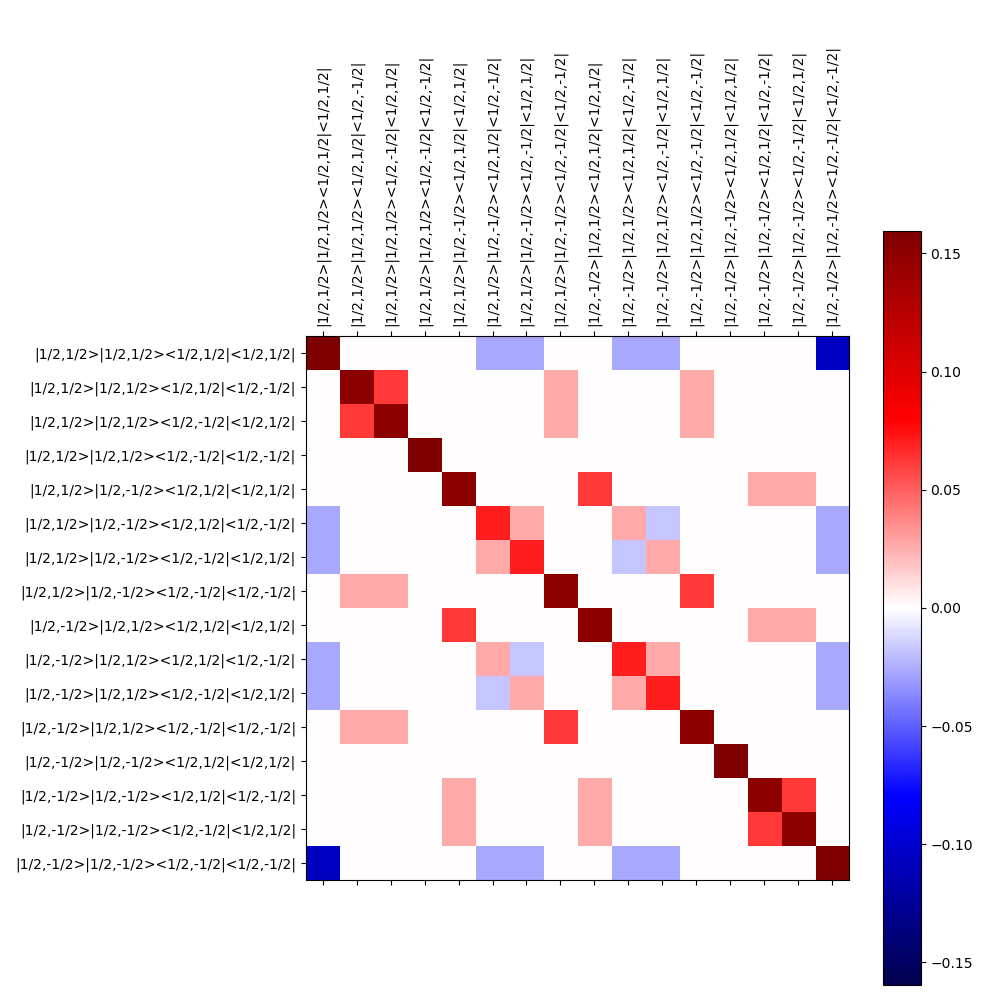

In [23]:
plot = Plotting(QS)
plot.PlotFigureSize = (10,10)
plot.PlotFontSize = 10
plot.MatrixPlot(1,R_L.data.real,dic_Zeeman,dic_Zeeman)

### Converting  Relaxation Superoperator in Liouville Space from Zeeman to PMZ basis

In [24]:
R_L_PMZ = BS.BasisChange_Operator(R_L,U_Z_PMZ)

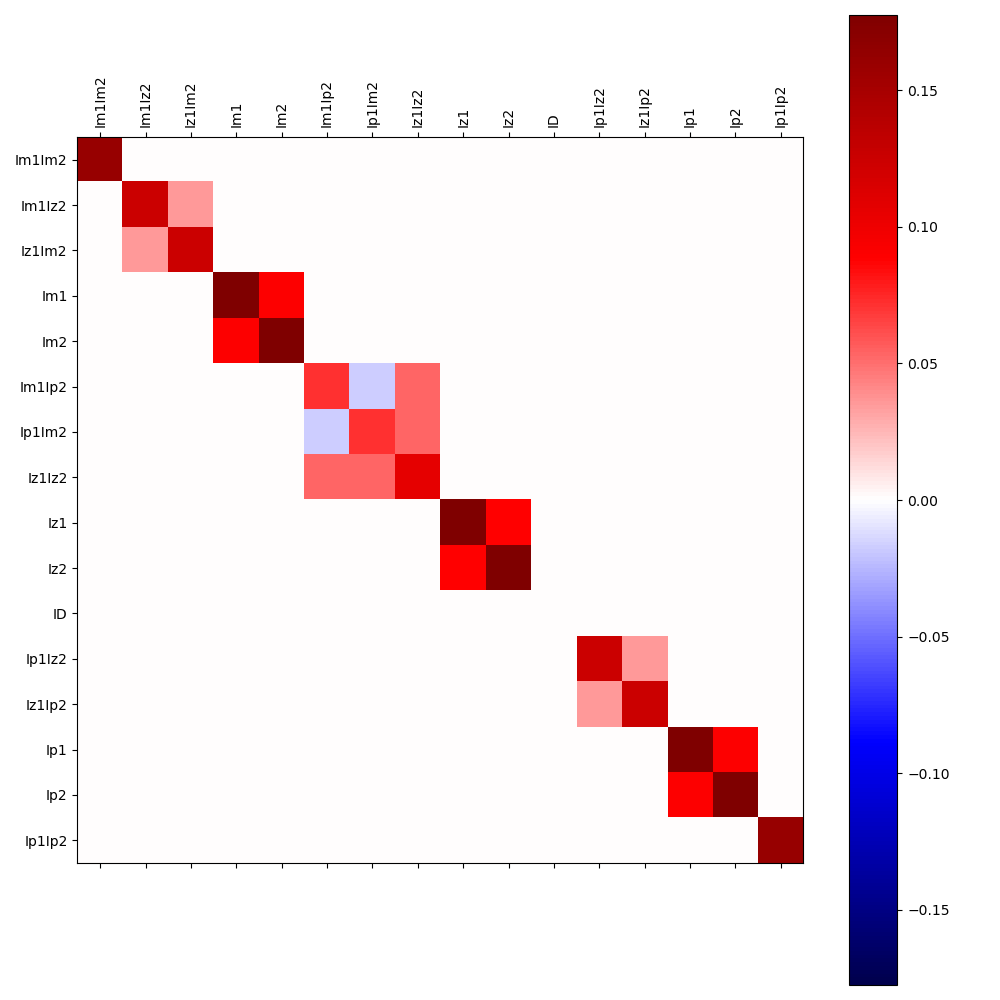

In [25]:
plot.MatrixPlot(3,R_L_PMZ.data.real,dic_PMZ,dic_PMZ)